# Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import functions

tmax = 500
L = 500
N = 100
vmax = 5
p = 0.2

# Flow vs density

The time-averaged flow q between i and i+1 is:

$q = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i,i+1}(t)$

The density p on a fixed site i averaged over a time period T:

$p = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i}(t)$

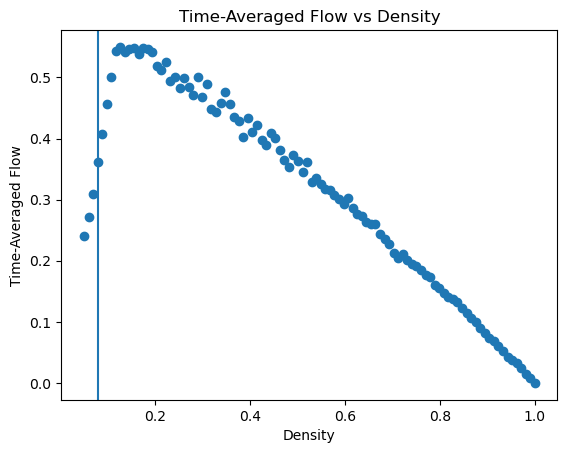

In [10]:
# Evenly spaced density values
densities = np.linspace(0.05, 1, 100)

flow_vs_density = []
car_densities = []

for density in densities:
    simulation = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, seed = 2024)
    simulation.run_model()
    single_cell_flow = simulation.flow()
    car_density = simulation.density()
    
    final_single_cell_flow = single_cell_flow/t_max
    final_car_density = car_density/t_max

    flow_vs_density.append(final_single_cell_flow)
    car_densities.append(final_car_density)

# Plotting
plt.scatter(densities, flow_vs_density) # Not sure whether to use car_densities or densities here
plt.xlabel('Density')
plt.ylabel('Time-Averaged Flow')
plt.title('Time-Averaged Flow vs Density')
plt.axvline(x=0.08)
plt.show()

# Cluster distribution 

(a way of measuring the amount of traffic)

The below plot (visually) shows that the clusters fluctuate a lot but overall neither increase nor decrease.

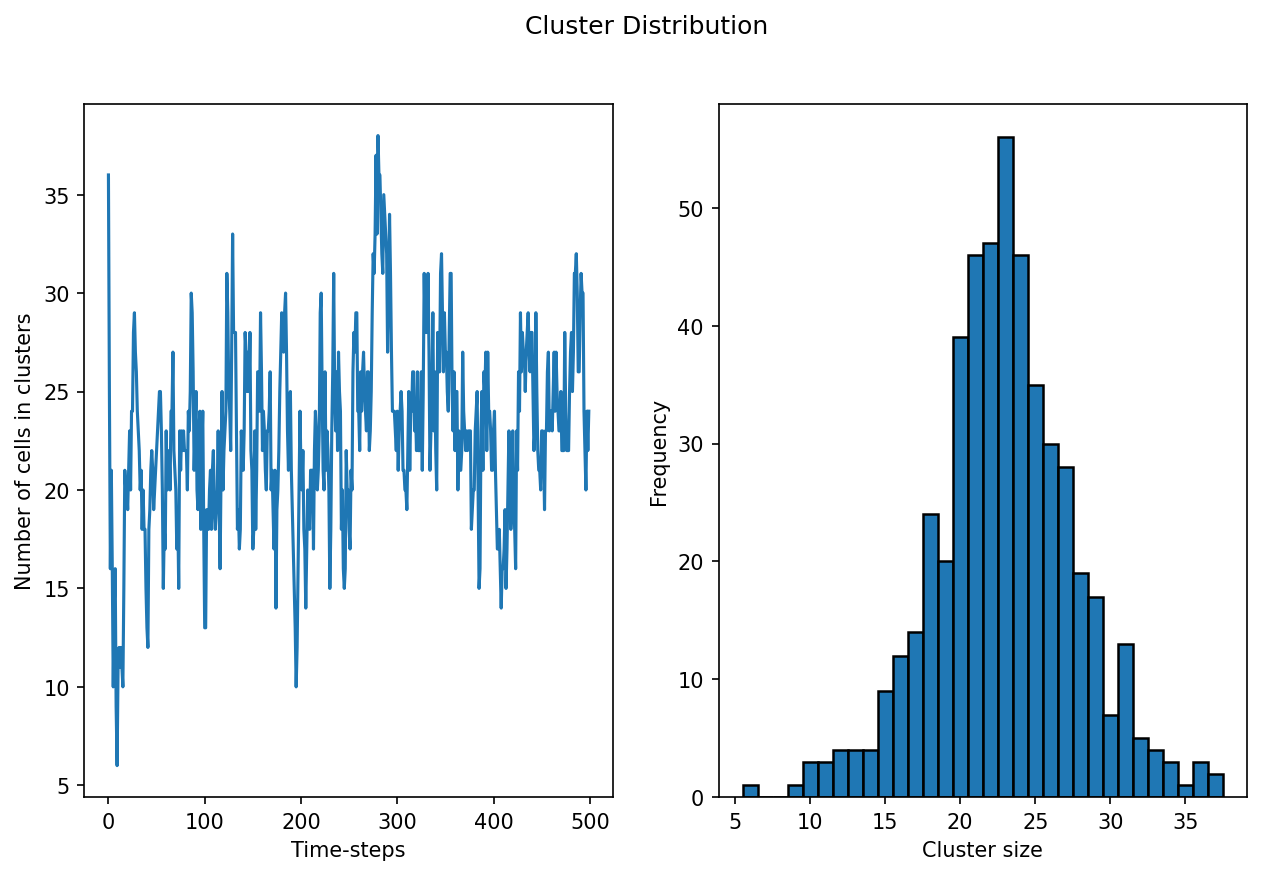

The average number of cells in clusters at one time is 22.888 .
This corresponds to 22.888 percent of cars stuck in traffic.


In [23]:
simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, seed = 2024)
simulation.run_model()
cluster_distribution = simulation.clusters()[0]

x = np.arange(min(cluster_distribution), max(cluster_distribution))

# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(range(tmax), cluster_distribution)
axs[0].set_xlabel('Time-steps')
axs[0].set_ylabel('Number of cells in clusters')
axs[1].hist(cluster_distribution, bins = len(x), align = 'left', edgecolor = 'black', linewidth = 1.2)
axs[1].set_xlabel('Cluster size')
axs[1].set_ylabel('Frequency')
plt.suptitle('Cluster Distribution')
plt.show()

'''Average number of clusters and its variation for a fixed density'''

# Calculate the average
average_cells_in_clusters = np.mean(cluster_distribution)
percentage_in_traffic = 100*average_cells_in_clusters/N

print("The average number of cells in clusters at one time is", average_cells_in_clusters,".") 
print("This corresponds to", percentage_in_traffic, "percent of cars stuck in traffic.")

Percentage of cells/cars in clusters/traffic for different densities

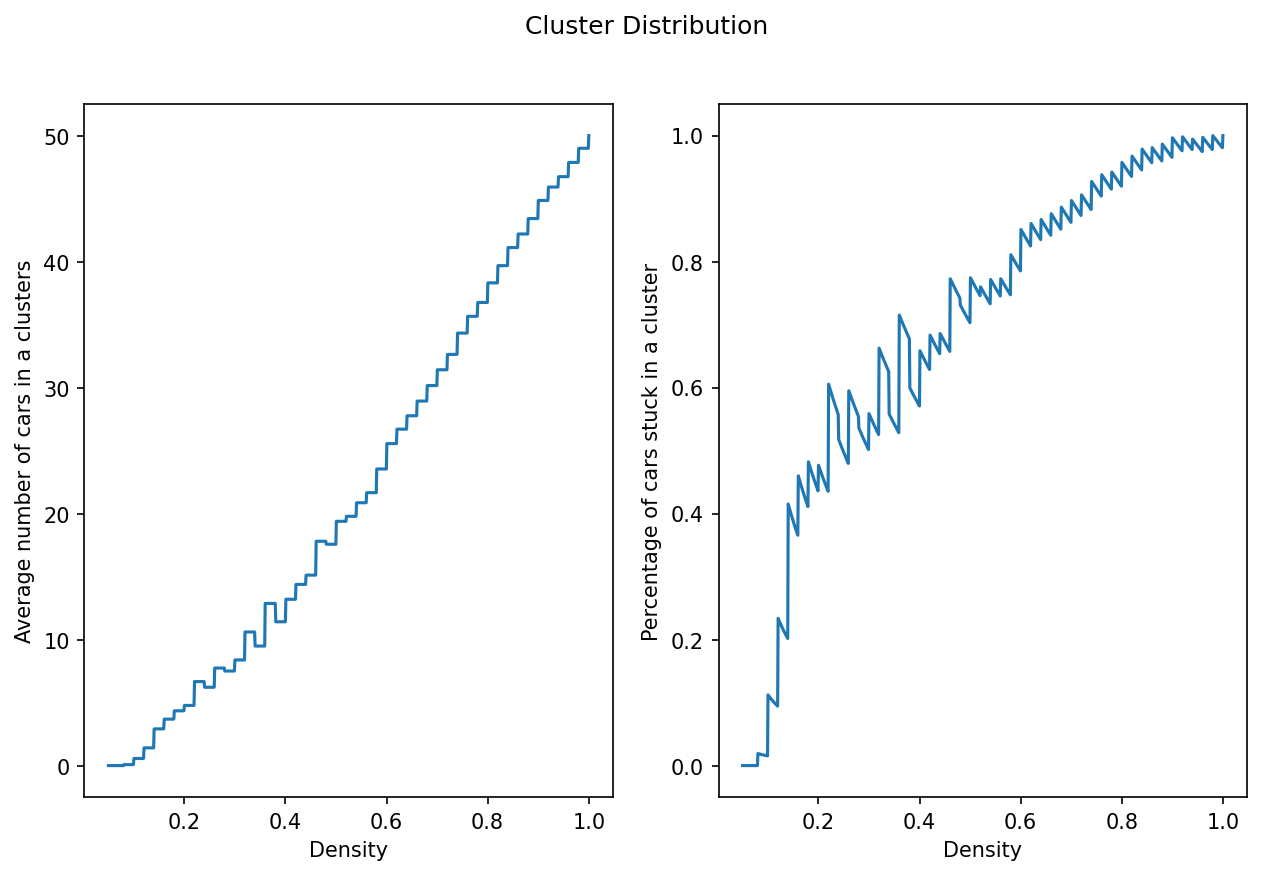

In [12]:

densities = np.linspace(0.05, 1, 1000)

cluster_averages = []
percent_average = []

for density in densities:
    simulation = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, seed = 2024)
    simulation.run_model()
    cluster_list = simulation.clusters()[0]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)
    percent_average.append(cluster_average/(density*L))
    

# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(densities, cluster_averages)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Average number of cars in a clusters')
axs[1].plot(densities, percent_average)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Percentage of cars stuck in a cluster')
plt.suptitle('Cluster Distribution')
plt.show()

Average number of cells in clusters (zoomed in to small densities)

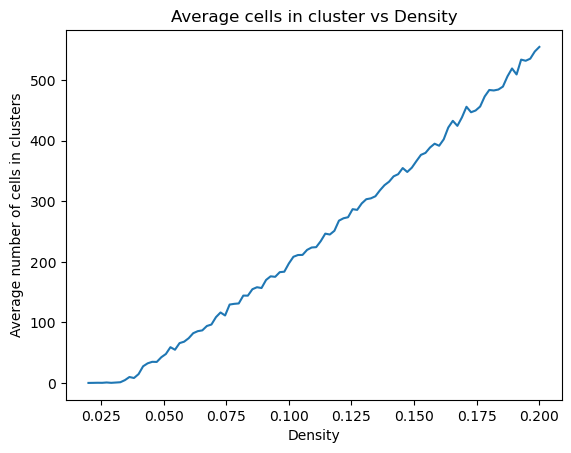

In [13]:
'''
Not using for presentation
'''


# # Parameters
# L = 5000
# N = 10
# v_max = 5
# p = 0.8
# t_max = 1000

# densities = np.linspace(0.02, 0.2, 100)

# cluster_averages = []

# for density in densities:
#     simulation = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, seed = 2024)
#     simulation.run_model()
#     cluster_list = simulation.clusters()[0]
#     cluster_average = np.mean(cluster_list)
#     cluster_averages.append(cluster_average)

# # Plotting
# plt.plot(densities, cluster_averages)
# plt.xlabel('Density')
# plt.ylabel('Average number of cells in clusters')
# plt.title('Average cells in cluster vs Density')
# plt.show()


Number of clusters and their size

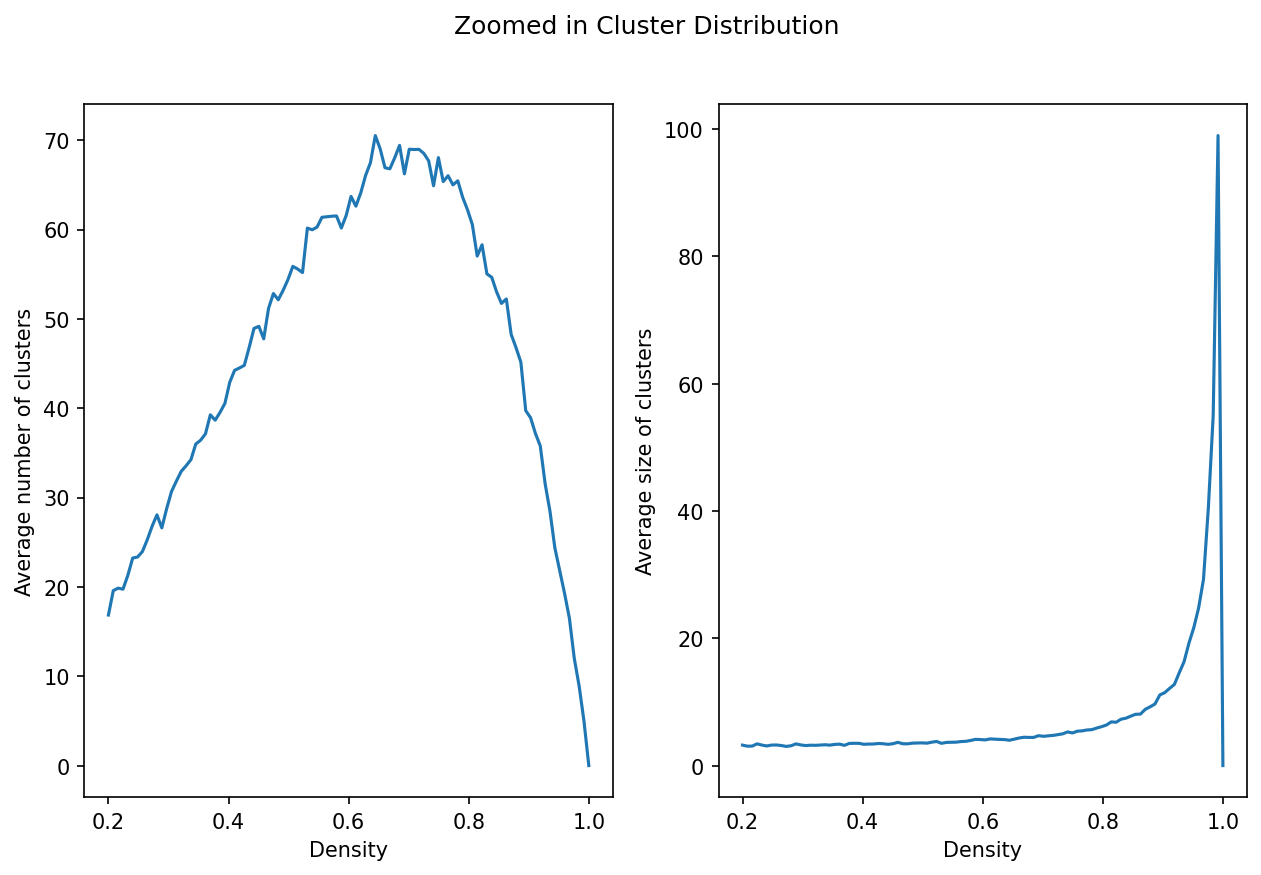

In [14]:
# Parameters
L = 500
N = 10
v_max = 5
p = 0.8
t_max = 1000

densities = np.linspace(0.2, 1, 100)

average_cells_in_clusters_per_density = []
average_number_clusters_per_density = []
average_cluster_sizes = []


for density in densities:

    simulation = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, seed = 2024)
    simulation.run_model()
    cells_cluster_list = simulation.clusters()[0]
    cluster_count_list = simulation.clusters()[1]
    
    # Cells calculations
    cells_cluster_average = np.mean(cells_cluster_list)
    average_cells_in_clusters_per_density.append(cells_cluster_average)

    # Cluster calculations
    cluster_count_average = np.mean(cluster_count_list)
    average_number_clusters_per_density.append(cluster_count_average)

    # Cluster size calculations
    average_cluster_size = cells_cluster_average/cluster_count_average if cluster_count_average != 0 else 0
    average_cluster_sizes.append(average_cluster_size)


# Plotting two graphs: number of cells in clusters and number of clusters
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(densities, average_number_clusters_per_density)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Average number of clusters')
axs[1].plot(densities, average_cluster_sizes)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Average size of clusters')
plt.suptitle('Number of clusters and their sizes')
plt.show()